In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"B:\VIRTUAL DS INTERNSHIP\Cognifiz-INTERN\Dataset .csv")
pd.set_option('display.max_columns', None)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
# checking for the missing values
missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


THERE ARE 9 MISSNG VALUES IN THE 'cuisines' column.

In [4]:
#Impute the missing values
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

ALL THE MISSING VALUES ARE BEEN IMPUTED.

# Task-2: Customer Performance Analysis

## Analyze the relationship between the type of cuisine and the restaurant's rating

In [5]:
# Grouping the cuisine and calculate average rating.
average_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean()

print(average_rating_by_cuisine)

Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1826, dtype: float64


## Identify the most popular cuisines among customers based on the number of votes.

In [6]:
cuisine_votes = df['Cuisines'].value_counts()
print("Top 5 Most popular Cuisines:\n", cuisine_votes.nlargest(5))

Top 5 Most popular Cuisines:
 North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


## Determine if there are any specific cuisines that tend to receive higher ratings.

In [7]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values('Aggregate rating', ascending= False)
print("Top 5 Cuisines with the Highest Average Rating:\n", cuisine_ratings.head(5))

Top 5 Cuisines with the Highest Average Rating:
                           Cuisines  Aggregate rating
683            Continental, Indian               4.9
169       BBQ, Breakfast, Southern               4.9
1062                 Italian, Deli               4.9
37    American, Caribbean, Seafood               4.9
302        Burger, Bar Food, Steak               4.9


## TASK-3: Data visualization


## Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

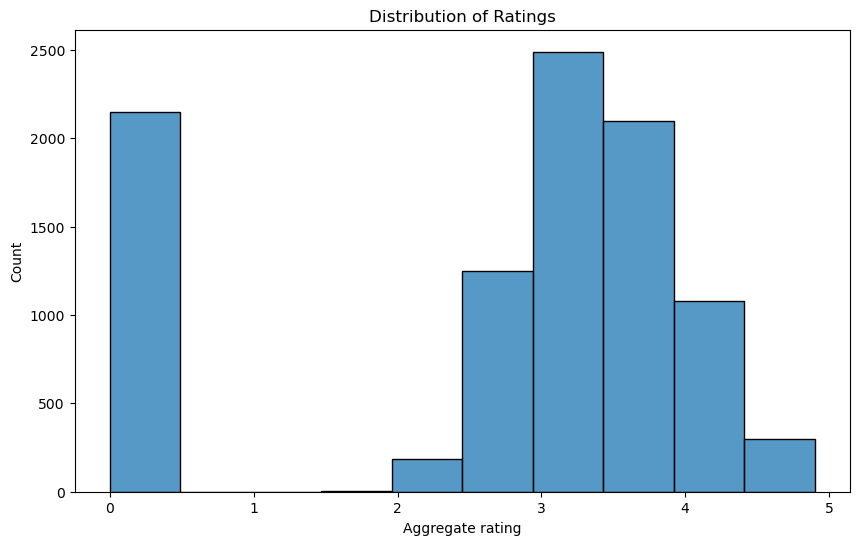

In [8]:
#Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'], bins=10)
plt.title('Distribution of Ratings')
plt.show()

## Compare the average ratings of different cuisines or cities using appropriate visualizations.

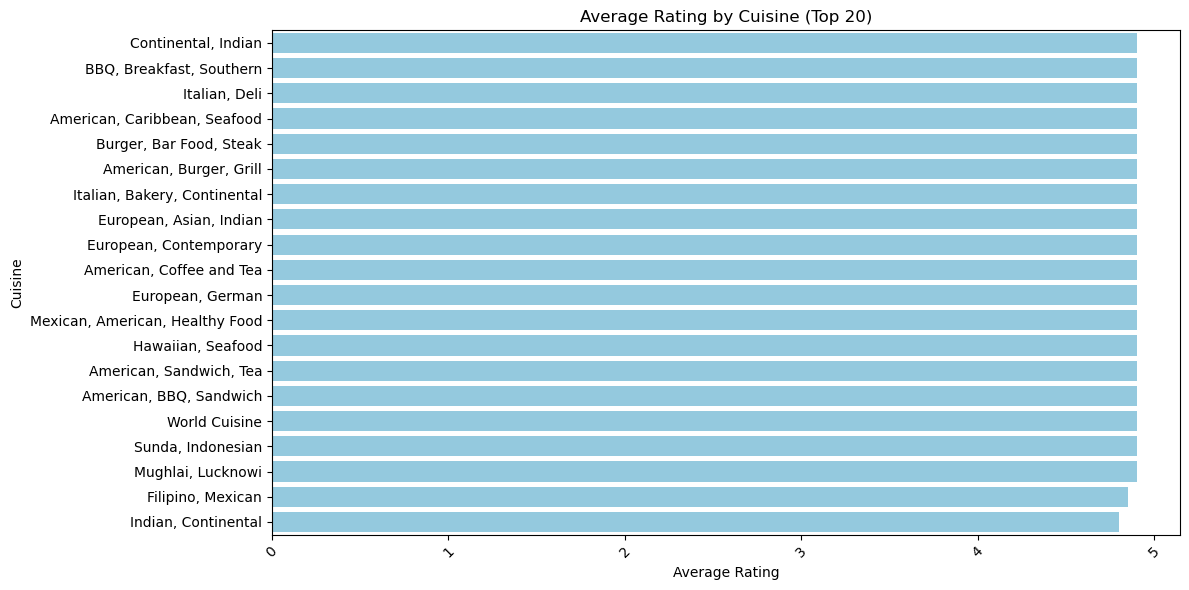

In [9]:
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean()

avg_rating_by_cuisine = avg_rating_by_cuisine.sort_values(ascending=False)

top_n_cuisines = 20
avg_rating_by_cuisine = avg_rating_by_cuisine.head(top_n_cuisines)


plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_cuisine, y= avg_rating_by_cuisine.index, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Average Rating by Cuisine (Top {})'.format(top_n_cuisines))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize the relationship between various features and the target variable to gain insights.


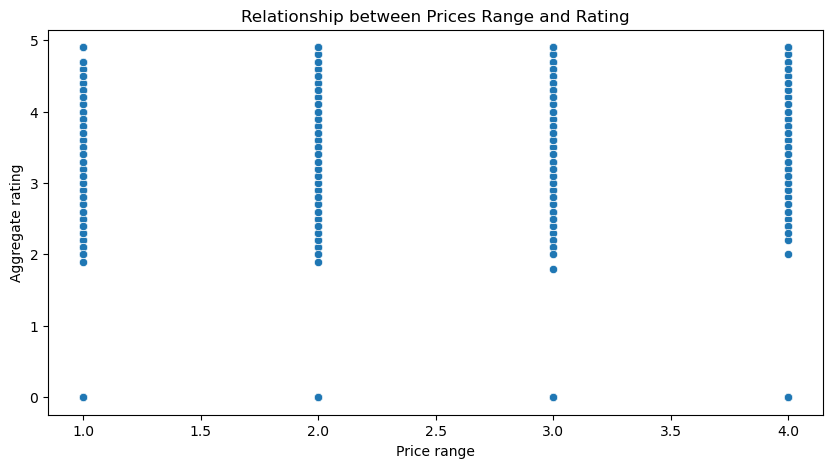

In [10]:
#Scater plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Relationship between Prices Range and Rating')
plt.show()

## Extraating additional new featues

In [11]:
df['Customer Value'] = df['Votes'] * df['Price range']

In [12]:
df['Population score']  = df['Aggregate rating'] * df['Votes']

In [13]:
df['Address Length'] = df['Address'].apply(len)

In [14]:
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

In [15]:
df['Multiple Cuisines'] = df['Cuisine Count'].apply(lambda x: 1 if x>1 else 0)

In [16]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

## TASK: Predictive Modeling

## Build a regression model to predict the aggregate rating of a restaurant based on available features.

## Target column Analysis

In [17]:
print(df['Aggregate rating'].describe())

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


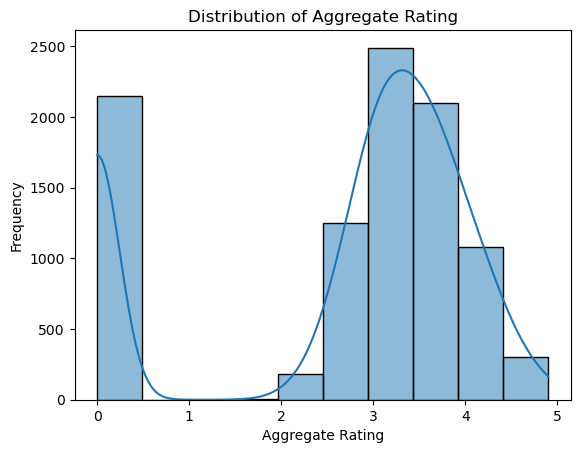

In [18]:
#Visualizing the distribution
sns.histplot(df['Aggregate rating'], bins = 10, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [19]:
df = df.drop(columns=['Restaurant Name', 'Address', 'Cuisines'], errors='ignore')

In [20]:
df.head()

,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Customer Value,Population score,Address Length,Cuisine Count,Multiple Cuisines,Restaurant Name Length
0,6317637,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,942,1507.2,71,3,1,16
1,6304287,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1773,2659.5,67,1,0,16
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,1080,1188.0,56,4,1,22
3,6318506,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,1460,1788.5,70,2,1,4
4,6314302,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,916,1099.2,64,2,1,11


In [46]:
#print(df['City'].unique().tolist())

In [47]:
#print(df['Locality'].unique().tolist())

## ENCOADING

In [24]:
 # Encode categorical features
categorical_cols = ['City', 'Locality', 'Currency', 'Rating color', 'Rating text']
df[categorical_cols] = df[categorical_cols].apply(pd.Categorical)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.cat.codes)

# Convert binary features
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

### Creating new Featue

In [25]:
df['Has_Table_Booking_and_Online_Delivery'] = df['Has Table booking'] * df['Has Online delivery']

## Spliting the data into Training and Testing sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = df[['Restaurant ID', 'Country Code', 'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now','Switch to order menu', 'Price range','Votes','Cuisine Count', 'Multiple Cuisines',
       'Has_Table_Booking_and_Online_Delivery']]
y = df['Aggregate rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Experiment with different algorithms


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
algorithms = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
}

In [30]:
for name, algorithm in algorithms.items():
    algorithm.fit(x_train, y_train)
    y_pred = algorithm.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"MSE: {mse}")
    print(f"R2: {r2}")
    print()

Linear Regression:
MSE: 1.471135708810121
R2: 0.35366201044261514

Decision Tree Regressor:
MSE: 0.1510518053375196
R2: 0.9336359524167684

Random Forest Regressor:
MSE: 0.0821190936682365
R2: 0.9639212823209004

Support Vector Regressor:
MSE: 2.0709706910554226
R2: 0.09012674706151413



## Feature Importance Analysis

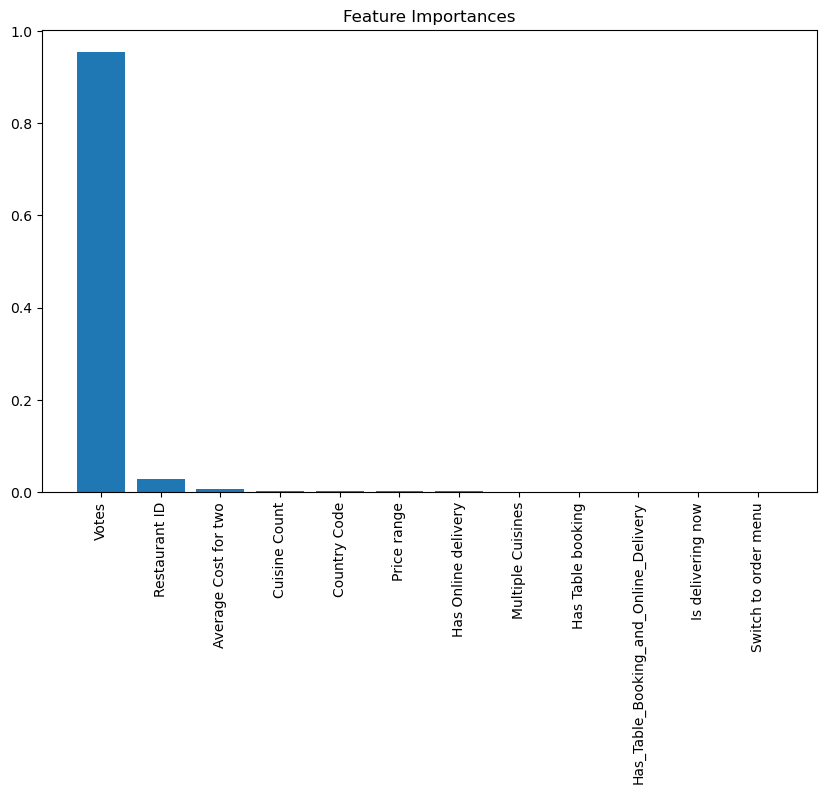

In [31]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x_train.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

## Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid = param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)
print("Best Parameters:",  grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


## Evaluate the Final Model


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Performance:")
print("MSE:", mse)
print("R2:", r2)

Final Model Performance:
MSE: 0.0779146004211111
R2: 0.9657685107554902


## Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(best_model, x, y, cv=5, scoring="r2")
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

Cross-Validation R2 Scores: [0.91951902 0.9509359  0.97323945 0.96856402 0.96118973]
Mean R2 Score: 0.9546896213131015


In [39]:
import pickle

# Save the best model using pickle
with open("Restaurant_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)  # Change to best_rf if using Random Forest

print("Model saved successfully!")

Model saved successfully!


In [48]:
#print(df['Locality'].unique().tolist())

In [49]:
#print(df['City'].unique().tolist())

In [50]:
#print(df['Locality'].unique().tolist())

In [51]:
#print(df['Restaurant ID'].unique().tolist())